<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

In [40]:
from matplotlib import pyplot as plt

### 1.1 Random numbers from the Normal distribution

![](normaldist.png)

In [1]:
np.random.normal(loc=5, scale=2, size=10) #loc = mean, scale = sd, size = no.

array([4.14468561, 4.41853997, 1.09964484, 7.00352673, 3.86216312,
       7.63552655, 8.72591112, 2.82109562, 5.88630037, 3.58330806])

The function we need to draw normal random samples is np.random.normal(loc=, scale=, size=). loc is used to specify the mean and scale the standard deviation. For example:

In [4]:
np.random.normal(size=15) #default loc and scale = 1

array([-0.53250355, -1.25981497,  0.52252031, -0.29773984,  0.57853319,
        0.59303071, -0.02908712,  0.11451395,  1.0588075 ,  0.85157065,
        0.20234831, -0.09376972, -1.52668132, -0.85145722, -0.51947179])

In [38]:
np.std(np.random.normal(size=50))

0.844665676588689

### 1.2 Visualising the random numbers

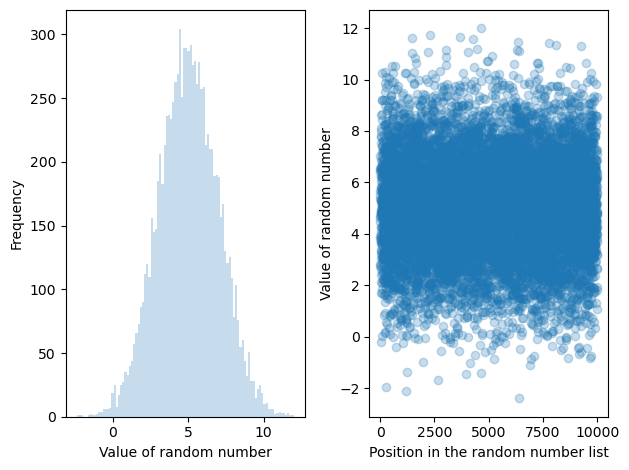

In [43]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()
plt.show()

### 1.3 68%?

In [55]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.06%


## 1 Brownian Motion in 1D

### 1.1 The scenario

Let’s simulate a simple random walk29 in 1D. The scenario is such that a particle is restricted to moving in 1D (i.e. only along a line). It moves in steps, either one unit to the left or one to the right. The choice of left or right is selected randomly. Let’s take the probability of going right as 
p, and going left is q = 1 − p.

### 1.2 The simulation

In [56]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [58]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

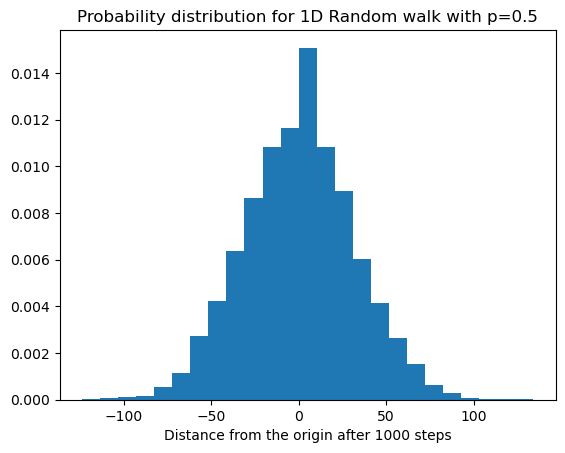

In [61]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True) #density to normalise the area under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

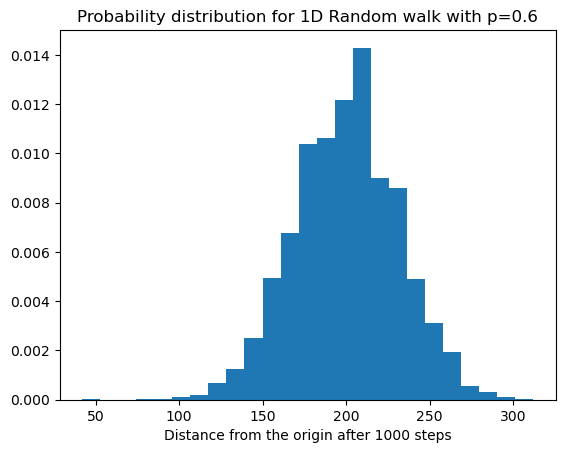

In [62]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True) #density to normalise the area under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [63]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

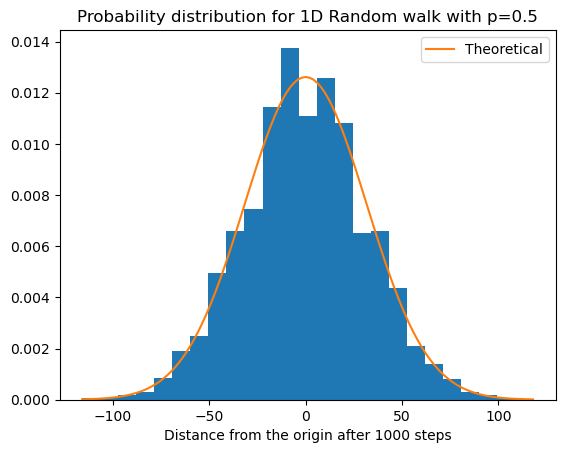

In [74]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True) #density to normalise the area under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.legend('Monte Carlo', loc = 'upper left')                                                 #how ya this line

q = 1 - p                       # q = 1 -p
mean = no_of_steps * (p - q)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*p*q) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend()
plt.show()

By the way, techniques such as the above that involve random numbers are called Monte Carlo methods. This is because random numbers are associated with gambling, and the city of Monte Carlo is famous for the latter.

## 2 Estimating \(\pi\)

### 2.1 The method

![](oldpi.png)

### 2.2 A poor but intuitive solution

In [79]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14684

### 2.3 A better solution

In [80]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.14306

### 2.4 A smarter solution

There is room to improve our algorithm. Notice that if we limit our experiment to only the first quadrant of the circle and the related square, our equation remains the same!

However, the range for x and y becomes \[0,1). So, our statistics have improved drastically! We can now use the faster, simpler rand().

In [82]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.144008

## Exercise 1 :  Vital Stats of Random π

In [83]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    n_green=np.sum((x**2+y**2) <= 1)
    return 4 * (n_green / n)

In [86]:
repeats = 100
results = [estimate_pi(10000)
           for _ in range(repeats)]
print(np.mean(results))
print(np.std(results))

3.1414360000000006
0.016147628432683244


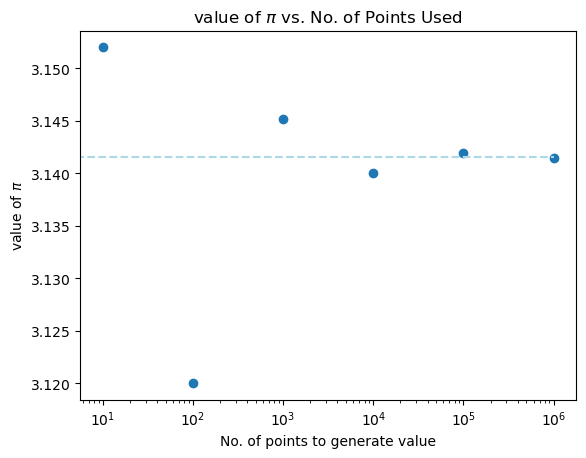

In [134]:
repeats = 100
y = []
yerr = []
alln = [10, 100, 1000, 10000, 100000, 1000000]
for i in alln:
    results = [estimate_pi(i) for _ in range(repeats)]
    y += [np.mean(results)]
    yerr += [np.std(results)]

plt.xlabel('No. of points to generate value')
plt.ylabel('value of $\pi$')
plt.title('value of $\pi$ vs. No. of Points Used')     
plt.hlines(np.pi, 0, 10**6, linestyle='--', colors='lightblue')
fmt='o'
plt.xscale('log')
plt.scatter(alln, y, alpha=1)
plt.show()

In [ ]:
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')

In [ ]:
# Lets start plotting
plt.errorbar(x, y_3, yerr=yerr,
             color='b', label='Y3 with errors')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')
plt.show()

In [ ]:
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")